In [1]:
import numpy as np

In [2]:
np.argmax(np.bincount([0, 0, 1], weights = [0.2, 0.2, 0.6]))

1

In [3]:
ex = np.array([[ 0.9, 0.1], [0.8, 0.2], [0.4, 0.6]])
p=np.average(ex, axis=0, weights=[0.2, 0.2, 0.6])
p

array([0.58, 0.42])

In [4]:
np.argmax(p)

0

In [5]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator

In [6]:
class MajorityVoteClassifier (BaseEstimator, ClassifierMixin): 

    def __init__ (self, classifiers, vote = 'classlabel', weights = "balanced"):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights
        
    def  fit(self, X, y):
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):

        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:
            predictions = np.asarray([clf.predict(X)
                                    for clf in self.classifiers_ ]).T

            maj_vote = np.apply_along_axis(lambda x: np.argmax 
                                            (np.bincount(x, weights = self.weights)),
                                            axis=1, arr = predictions)
            maj_vote = self.lablenc_.inverse_transform(maj_vote)
            return maj_vote

    def predict_proba(self, X):

        probas = np.asarray([clf.predict_proba(X)
                            for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):

        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)

        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteriterms(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

In [7]:
import pandas as pd

In [9]:
X = pd.read_csv('C:\\Users\\suleiman\\Documents\\scikit\\csv_files\\wrst_hist\\NHS_Seg_10.csv', header = None )

In [10]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
X, y = X.iloc[:,1:].values, X.iloc[:,0].values

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [14]:
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [21]:
clf1 = SVC(kernel='rbf', C=1, gamma=0.1, probability=True, class_weight="balanced")

In [22]:
pipe1 = Pipeline ([['sc', StandardScaler()], ['clf', clf1]])

In [23]:
clf_labels = ['SVM']

In [24]:
print('10-fold cross validation: \n')

10-fold cross validation: 



In [20]:
for clf, label in zip([pipe1], clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring = 'roc_auc')
    print("ROC AUC: %0.3f(+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

ROC AUC: 0.839(+/- 0.042) [SVM]


In [19]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1])
clf_labels += ['Majority Voting']
all_clf = [pipe1]
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring = 'roc_auc')
    print("ROC AUC: %0.3f(+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

ROC AUC: 0.860(+/- 0.040) [SVM]


In [19]:
for clf, label in zip([pipe1], clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring = 'accuracy')
    print("Accuracy: %0.3f(+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.836(+/- 0.019) [SVM]


In [21]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1])
clf_labels += ['Majority Voting']
all_clf = [pipe1]
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring = 'accuracy')
    print("Accuracy: %0.3f(+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.685(+/- 0.010) [SVM]


In [25]:
from sklearn.metrics import cohen_kappa_score

In [26]:
pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(random_state=1))])
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_train)
y_true=y_train
print("SVM Cohen Kappa") 
cohen_kappa_score(y_true, y_pred, weights=None) 

SVM Cohen Kappa


0.5617887947210168

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [36]:
clf1 = RandomForestClassifier (n_estimators = 1000, n_jobs=1)
pipe1 = Pipeline ([['sc', StandardScaler()], ['clf', clf1]])
pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=1))])
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_train)
y_true=y_train
print("RandomForest Cohen Kappa") 
cohen_kappa_score(y_true, y_pred, weights=None) 

RandomForest Cohen Kappa


0.9614986348644292

In [37]:
clf1 = AdaBoostClassifier(n_estimators=10000, learning_rate=1)
pipe1 = Pipeline ([['sc', StandardScaler()], ['clf', clf1]])
pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', AdaBoostClassifier(random_state=0))])
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_train)
y_true=y_train
print("AdaBoost Cohen Kappa") 
cohen_kappa_score(y_true, y_pred, weights=None) 

AdaBoost Cohen Kappa


0.5957823606182977

In [38]:
clf1 = GradientBoostingClassifier(n_estimators = 10000, learning_rate=1.0, max_depth=2)
pipe1 = Pipeline ([['sc', StandardScaler()], ['clf', clf1]])
pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', GradientBoostingClassifier(random_state=0))])
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_train)
y_true=y_train
print("Gradient Boosting Cohen Kappa") 
cohen_kappa_score(y_true, y_pred, weights=None) 

Gradient Boosting Cohen Kappa


0.7435131911675645

In [39]:
clf1 = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0), 
                         n_estimators=100, max_samples=1.0, max_features=5, bootstrap = False, bootstrap_features = True)
pipe1 = Pipeline ([['sc', StandardScaler()], ['clf', clf1]])
pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', BaggingClassifier(random_state=0))])
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_train)
y_true=y_train
print("Bagging Cohen Kappa") 
cohen_kappa_score(y_true, y_pred, weights=None) 

Bagging Cohen Kappa


0.9556360905182782

In [22]:
pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(random_state=1))])

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_train)
confmat = confusion_matrix(y_true=y_train, y_pred=y_pred)

In [25]:
print(confmat)

[[464  11]
 [120 107]]


In [26]:
import matplotlib.pyplot as plt

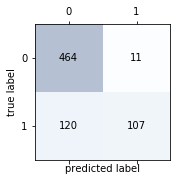

In [27]:
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range (confmat.shape[0]):
    for j in range (confmat.shape[1]):
        ax.text (x=j, y=i,
        s=confmat[i,j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [29]:
colors = ['blue']
linestyles = ['--']

In [30]:
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, treshholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc= %0.2f)' % (label, roc_auc))

In [31]:
plt.title('SVM ROC')
plt.legend(loc="lower right")
plt.plot ([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)

In [32]:
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

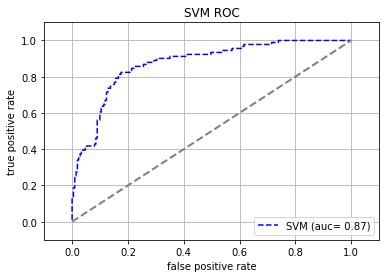

In [33]:
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix